In [1]:
import pandas as pd
train = pd.read_csv("updated_train.csv")
X_test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")
y_test = pd.read_csv("test_labels.csv")

In [2]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,normal
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,1
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,1
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,1
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,1


In [3]:
X_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [4]:
sample

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
 8   normal         159571 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 11.0+ MB


In [6]:
train['comment_text'].isnull().sum()

0

In [7]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'normal']
for label in labels:
    print(label)
    print(train[label].value_counts().to_string())

toxic
0    144277
1     15294
severe_toxic
0    157976
1      1595
obscene
0    151122
1      8449
threat
0    159093
1       478
insult
0    151694
1      7877
identity_hate
0    158166
1      1405
normal
1    143346
0     16225


In [8]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from keras.preprocessing.text import Tokenizer
from nltk.stem import SnowballStemmer, LancasterStemmer, PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from keras.preprocessing import sequence
from keras.utils import pad_sequences

import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
from nltk.corpus import words

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
!pip install tensorflow==1.15
import tensorflow.compat.v2 as tf

ERROR: Could not find a version that satisfies the requirement tensorflow==1.15 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==1.15


In [10]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install tensorflow

  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\deepa\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [13]:
# word tokenization
data = train['comment_text'][0]
tokens = word_tokenize(data.lower())
print('Before tokenizing')
print(data)
print()
print('After tokenizing')
print(tokens)

new_tokens_porter = []
porter = PorterStemmer()
for token in tokens:
    new_tokens_porter.append(porter.stem(token))
print()
print('After porter stemmer')
print(new_tokens_porter)

# Trying stemming

# Porter's Stemmer is the oldest stemmer method. Porter's Stemmer applies a set of five sequential rule to determine common suffixes from sentences done with regular expressions
# Snowball stemmer is an updated version of Porter’s Stemmer with new rules. The process is exactly the same as Porter’s Stemmer
# Lancaster Stemmer rules are more agressive than Porter and Snowball and it is one of the most agressive stemmers. As a general rule of thumb, think that the rules of Lancaster’s Stemmer try to reduce the word to the shortest stem possible

new_tokens_porter = []
porter = PorterStemmer()
for token in tokens:
    new_tokens_porter.append(porter.stem(token))
print()
print('After porter stemmer')
print(new_tokens_porter)

new_tokens_snowball = []
snowball = SnowballStemmer(language='english')
for token in tokens:
    new_tokens_snowball.append(snowball.stem(token))
print()
print('After snowball stemmer')
print(new_tokens_snowball)

new_tokens_lancaster = []
lancaster = LancasterStemmer()
for token in tokens:
    new_tokens_lancaster.append(lancaster.stem(token))
print()
print('After lancaster stemmer')
print(new_tokens_lancaster)
# stemming does not refer to the root of the word

# Trying lemmatization
def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

new_tokens_lemmatizer = []
lemmatizer = WordNetLemmatizer()
for token in tokens:
    new_tokens_lemmatizer.append(lemmatizer.lemmatize(token, get_pos(token)))
print()
print('After wordnet lemmatizer')
print(new_tokens_lemmatizer)

Before tokenizing
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

After tokenizing
['explanation', 'why', 'the', 'edits', 'made', 'under', 'my', 'username', 'hardcore', 'metallica', 'fan', 'were', 'reverted', '?', 'they', 'were', "n't", 'vandalisms', ',', 'just', 'closure', 'on', 'some', 'gas', 'after', 'i', 'voted', 'at', 'new', 'york', 'dolls', 'fac', '.', 'and', 'please', 'do', "n't", 'remove', 'the', 'template', 'from', 'the', 'talk', 'page', 'since', 'i', "'m", 'retired', 'now.89.205.38.27']

After porter stemmer
['explan', 'whi', 'the', 'edit', 'made', 'under', 'my', 'usernam', 'hardcor', 'metallica', 'fan', 'were', 'revert', '?', 'they', 'were', "n't", 'vandal', ',', 'just', 'closur', 'on', 'some', 'ga', 'after', 'i', 'vote', 'at', 'new', 'york', 'doll', 'fac', '.'

In [14]:
train.drop('id', axis=1, inplace=True)
train

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,normal
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,1
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,1
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,1
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,1


In [15]:
bigX = train.drop(labels,axis=1).to_numpy().reshape(-1,)
bigy = train[labels].to_numpy()

In [16]:
from sklearn.model_selection import train_test_split
X_train_dev, X_test, y_train_dev, y_test = train_test_split(bigX, bigy,
                                                    test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train_dev, y_train_dev,
                                                    test_size=0.2)

In [17]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(bigX)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix_train = pad_sequences(sequences,maxlen=max_len)
sequences = tok.texts_to_sequences(X_test)
sequences_matrix_test = pad_sequences(sequences,maxlen=max_len)
sequences = tok.texts_to_sequences(X_val)
sequences_matrix_val = pad_sequences(sequences,maxlen=max_len)
sequences = tok.texts_to_sequences(bigX)
sequences_matrix_big = pad_sequences(sequences,maxlen=max_len)

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Embedding(max_words,50,input_length=max_len, input_shape=[max_len]))
model.add(layers.LSTM(64, dropout=0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(7, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 97,879
Trainable params: 97,879
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(sequences_matrix_train,
                    y_train,
                    epochs=1,
                    batch_size=512,
                    validation_data=(sequences_matrix_val, y_val))

200/200 [==============================] - 80s 395ms/step - loss: 0.1915 - accuracy: 0.8948 - val_loss: 0.1699 - val_accuracy: 0.8977


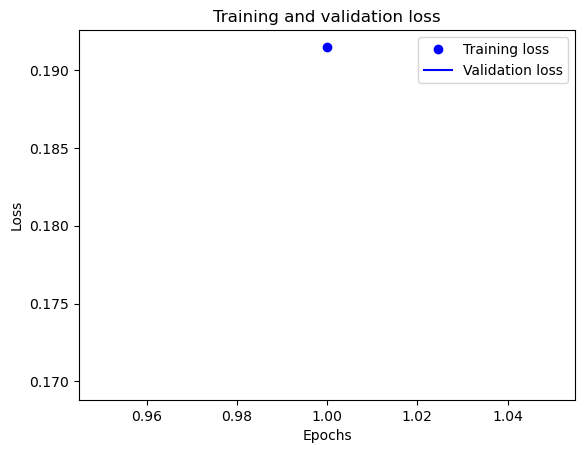

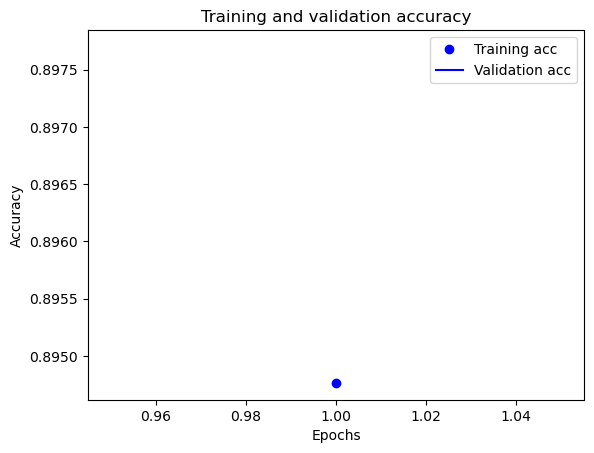

In [21]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
results = model.evaluate(sequences_matrix_test, y_test)

998/998 [==============================] - 12s 12ms/step - loss: 0.1712 - accuracy: 0.8966


Epoch 1/2
312/312 [==============================] - 127s 402ms/step - loss: 0.1725 - accuracy: 0.8964 - val_loss: 0.1195 - val_accuracy: 0.9021
Epoch 2/2
312/312 [==============================] - 116s 372ms/step - loss: 0.0991 - accuracy: 0.9311 - val_loss: 0.0882 - val_accuracy: 0.9409


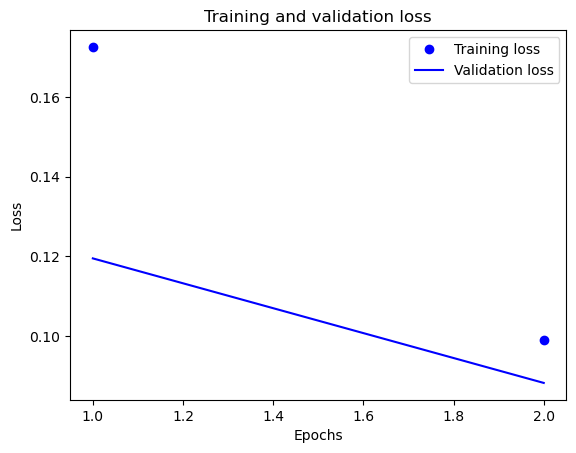

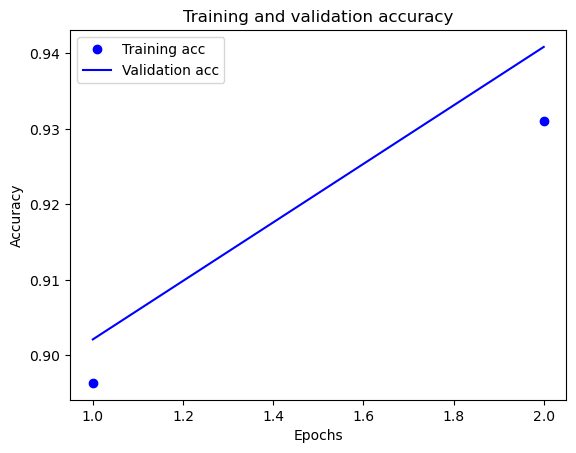

998/998 [==============================] - 12s 12ms/step - loss: 0.0918 - accuracy: 0.9384


[0.09179309755563736, 0.9383675456047058]

In [23]:
model = models.Sequential()
model.add(layers.Embedding(max_words,50,input_length=max_len, input_shape=[max_len]))
model.add(layers.LSTM(64, dropout=0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(7, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(sequences_matrix_big,
                    bigy,
                    epochs=2,
                    batch_size=512,
                    validation_data=(sequences_matrix_val, y_val))


acc = history.history['accuracy']
val_acc_values = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

model.evaluate(sequences_matrix_test, y_test)

In [24]:
sample

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


In [25]:
X_test = pd.read_csv("test.csv")
X_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [26]:
id_col = X_test['id']
test = X_test.drop('id', axis=1).to_numpy().reshape(-1,)
sequences = tok.texts_to_sequences(test)
sequences_matrix_test_final = pad_sequences(sequences,maxlen=max_len)
y_pred = model.predict(sequences_matrix_test_final)
y_pred

4787/4787 [==============================] - 56s 12ms/step


array([[9.1331106e-01, 3.3956221e-01, 8.1670827e-01, ..., 7.3846972e-01,
        2.2673292e-01, 6.2510557e-02],
       [1.4077168e-02, 1.0644897e-04, 3.1540573e-03, ..., 3.8645198e-03,
        6.9285429e-04, 9.8398525e-01],
       [1.4732897e-02, 9.8153774e-05, 3.1884417e-03, ..., 4.0818411e-03,
        6.4810854e-04, 9.8433536e-01],
       ...,
       [4.7920281e-03, 2.2421087e-05, 9.7994355e-04, ..., 1.2565115e-03,
        2.1461725e-04, 9.9427658e-01],
       [4.1936147e-03, 1.8969942e-05, 8.4121310e-04, ..., 1.0950278e-03,
        1.9339712e-04, 9.9506027e-01],
       [1.2500203e-01, 3.1764507e-03, 3.9947104e-02, ..., 4.2951226e-02,
        9.0534370e-03, 8.6437154e-01]], dtype=float32)

In [27]:
sample.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [32]:
# Get input text from the user
input_text = input("Enter some text to predict sentiment: ")

# Preprocess the input text
input_sequence = tok.texts_to_sequences([input_text])
input_sequence_matrix = pad_sequences(input_sequence, maxlen=max_len)

# Make a prediction using the trained model
y_pred = model.predict(input_sequence_matrix)
print(y_pred)

Enter some text to predict sentiment: My name hello guys bla bla bla
1/1 [==============================] - 0s 29ms/step
[[0.1134158  0.00138394 0.03000708 0.00105776 0.03345627 0.00421346
  0.88202214]]


In [36]:
pip install speechrecognition

  Using cached SpeechRecognition-3.10.0-py2.py3-none-any.whl (32.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [37]:
#importing library
import speech_recognition as sr
#Initiаlizing  reсоgnizer  сlаss  (fоr  reсоgnizing  the  sрeeсh)
r = sr.Recognizer()
with sr.AudioFile('WhatsApp Audio 2023-03-27 at 10.43.13.wav') as source:
    audio_text = r.listen(source)
    try:
        # using google speech recognition
        text = r.recognize_google(audio_text)
        print('Converting audio transcripts into text ...')
        print(text)
    except:
         print('Sorry.. run again...')
            
            
# Preprocess the input text
input_sequence = tok.texts_to_sequences([text])
input_sequence_matrix = pad_sequences(input_sequence, maxlen=max_len)

# Make a prediction using the trained model
y_pred = model.predict(input_sequence_matrix)
print(y_pred)

Converting audio transcripts into text ...
I will rope you and kill you
1/1 [==============================] - 0s 20ms/step
[[0.4292722  0.00634704 0.14542872 0.0030007  0.14015538 0.01138422
  0.55597913]]


In [38]:
r = sr.Recognizer()
with sr.AudioFile('WhatsApp Audio 2023-03-17 at 08.47.25.wav') as source:
    audio_text = r.listen(source)
    try:
        # using google speech recognition
        text = r.recognize_google(audio_text)
        print('Converting audio transcripts into text ...')
        print(text)
    except:
         print('Sorry.. run again...')
            
            
# Preprocess the input text
input_sequence = tok.texts_to_sequences([text])
input_sequence_matrix = pad_sequences(input_sequence, maxlen=max_len)

# Make a prediction using the trained model
y_pred = model.predict(input_sequence_matrix)
print(y_pred)

Converting audio transcripts into text ...
hello my name is Ankit
1/1 [==============================] - 0s 19ms/step
[[7.2982252e-02 8.5814961e-04 1.8663917e-02 7.5192738e-04 2.1632018e-02
  3.0884263e-03 9.2432171e-01]]


In [ ]:
prediction_df = pd.DataFrame()
prediction_df['id'] = id_col
prediction_df[labels] = y_pred
prediction_df

In [ ]:
prediction_df.to_csv('submission.csv', index=False)

In [ ]:
import pandas as pd

# Load the data into a pandas DataFrame
data = pd.read_csv('train.csv')

# Create a new column named "normal" and set its default value to 1
data['normal'] = 0

# Update the "normal" column to 0 if any of the other columns have a value of 1
data.loc[(data['toxic'] != 1) & (data['severe_toxic'] != 1) & (data['obscene'] != 1) & 
         (data['threat'] != 1) & (data['insult'] != 1) & (data['identity_hate'] != 1), 'normal'] = 1

# Save the updated data to a new CSV file
data.to_csv('updated_train.csv', index=False)